In [126]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [127]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [128]:
bikes['year_month'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y').dt.to_period('M')
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year_month
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,2011-01
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,2011-01
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,2011-01
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,2011-01
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,2011-01


In [129]:
bikes['day_of_week'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y').dt.dayofweek
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year_month,day_of_week
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,2011-01,5
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,2011-01,5
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,2011-01,5
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,2011-01,5
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,2011-01,5


In [130]:
bikes['total_riders'] = bikes['casual'] + bikes['registered']
bikes['total_riders'].head()

,total_riders
0,16
1,38
2,31
3,12
4,1


In [131]:
bikes['month'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y').dt.month
bikes['month'].head()

,month
0,1
1,1
2,1
3,1
4,1


In [132]:
import numpy as np
bikes['hr_cos'] = bikes['hr'].apply(lambda x: np.cos(x * (2 * np.pi / 24)))
bikes['hr_sin'] = bikes['hr'].apply(lambda x: np.sin(x * (2 * np.pi / 24)))



In [133]:
bikes['year'] = pd.to_datetime(bikes['dteday'], format='%m/%d/%Y').dt.year
bikes.head()

import requests

dc_crime_endpoints = [
    {"year": 2023, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/5/query"},
    {"year": 2022, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/4/query"},
    {"year": 2021, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/3/query"},
    {"year": 2020, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/2/query"},
    {"year": 2019, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/1/query"},
    {"year": 2018, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/0/query"},
    {"year": 2017, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/38/query"},
    {"year": 2016, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/26/query"},
    {"year": 2015, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/27/query"},
    {"year": 2014, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/40/query"},
    {"year": 2013, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/10/query"},
    {"year": 2012, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/11/query"},
    {"year": 2011, "url": "https://maps2.dcgis.dc.gov/dcgis/rest/services/FEEDS/MPD/FeatureServer/35/query"}
]

params = {
        'where': '1=1',
        'returnCountOnly': 'true',
        'f': 'json'
    }
crime_by_year = {
    2011: "",
    2012: "",
    2013: "",
    2014: "",
    2015: "",
    2016: "",
    2017: "",
    2018: "",
    2019: "",
    2020: "",
    2021: "",
    2022: "",
    2023: ""
}

for year in dc_crime_endpoints:
    response = requests.get(year['url'], params=params)
    count = response.json().get('count')
    crime_by_year[year['year']] = count

bikes['crime_count'] = bikes['year'].map(crime_by_year)
bikes.head()



,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year_month,day_of_week,total_riders,month,hr_cos,hr_sin,year,crime_count
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,2011-01,5,16,1,1.000000,0.000000,2011,33222
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,2011-01,5,38,1,0.965926,0.258819,2011,33222
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,2011-01,5,31,1,0.866025,0.500000,2011,33222
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,2011-01,5,12,1,0.707107,0.707107,2011,33222
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,2011-01,5,1,1,0.500000,0.866025,2011,33222


In [134]:
bikes = bikes[(bikes["year"] >= 2014) | (bikes["year"] != 2020)]
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year_month,day_of_week,total_riders,month,hr_cos,hr_sin,year,crime_count
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,2011-01,5,16,1,1.000000,0.000000,2011,33222
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,2011-01,5,38,1,0.965926,0.258819,2011,33222
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,2011-01,5,31,1,0.866025,0.500000,2011,33222
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,2011-01,5,12,1,0.707107,0.707107,2011,33222
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,2011-01,5,1,1,0.500000,0.866025,2011,33222


In [135]:
import numpy as np

def preprocessing(df, training_cols=None):
    df_copy = df.copy()
    df_copy['year_month'] = pd.to_datetime(df_copy['dteday'], format='%m/%d/%Y').dt.to_period('M')
    df_copy['day_of_week'] = pd.to_datetime(df_copy['dteday'], format='%m/%d/%Y').dt.dayofweek
    df_copy['month'] = pd.to_datetime(df_copy['dteday'], format='%m/%d/%Y').dt.month
    df_copy['hr_cos'] = df_copy['hr'].apply(lambda x: np.cos(x * (2 * np.pi / 24)))
    df_copy['hr_sin'] = df_copy['hr'].apply(lambda x: np.sin(x * (2 * np.pi / 24)))

    feature_cols = ['hr_cos','hr_sin', 'temp_c', 'year_month', 'day_of_week', 'weathersit', 'month', 'holiday', 'hum', 'windspeed']
    df_selected_features = df_copy[feature_cols]

    categorical_cols = ['year_month', 'day_of_week', 'weathersit', 'month']
    df_dummies = pd.get_dummies(df_selected_features, columns=categorical_cols)

    if training_cols is not None:
        # Add missing columns with 0
        missing_cols = set(training_cols) - set(df_dummies.columns)
        for c in missing_cols:
            df_dummies[c] = 0

        # Drop extra columns
        extra_cols = set(df_dummies.columns) - set(training_cols)
        df_dummies = df_dummies.drop(columns=list(extra_cols))

        # Reorder columns to match the training set
        df_dummies = df_dummies[training_cols]

    return df_dummies

X = preprocessing(bikes)
y = bikes['total_riders']
training_features_columns = X.columns


In [136]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [139]:
model = Sequential()

model.add(Dense(128, input_dim=len(X_train[0]), activation='swish'))
model.add(Dropout(.45))
model.add(Dense(256, activation='swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.99,
#     staircase=True
# )
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [141]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=15)

history = model.fit(X_train, y_train, epochs=1000, validation_split=.35, batch_size=100, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 124009.3828 - mse: 124009.3828 - val_loss: 48376.4414 - val_mse: 48376.4414
Epoch 2/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 48690.5898 - mse: 48690.5898 - val_loss: 40686.1367 - val_mse: 40686.1367
Epoch 3/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 38114.0586 - mse: 38114.0586 - val_loss: 18315.5000 - val_mse: 18315.5000
Epoch 4/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 21063.2148 - mse: 21063.2168 - val_loss: 14898.3818 - val_mse: 14898.3818
Epoch 5/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17843.1152 - mse: 17843.1152 - val_loss: 13344.4727 - val_mse: 13344.4727
Epoch 6/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16093.7295 - mse: 16093.7295 - val_loss: 12085.9424 - val_mse: 12085.9404
Epoch 7/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 14146.0332 - mse: 14146.0332 - val_loss: 10410.0664 - val_mse: 10410.0664
Epoch 8/1000
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 6

In [142]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │        23,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,413 (880.52 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 150,276 (587.02 KB)

In [143]:
# h = hist
hist = hist.reset_index()
# h

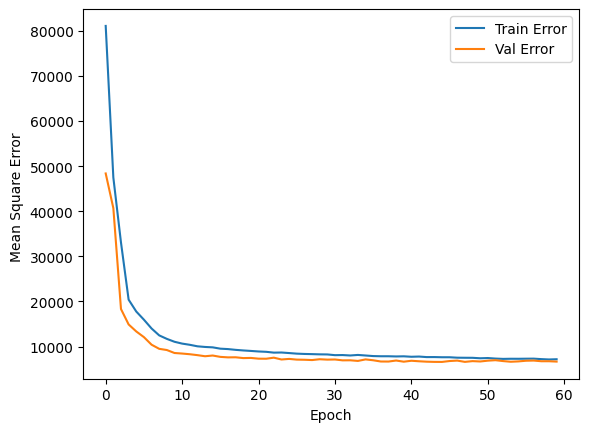

In [144]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [145]:
predictions = np.round(model.predict(X_test),1)

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [146]:
result = root_mean_squared_error(y_test, predictions)
result

82.01891326904297

In [147]:
r2 = r2_score(y_test,predictions)
r2

0.943139910697937

In [154]:
test = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

holdout = preprocessing(test, training_cols=training_features_columns)

holdout_normalized = norm.transform(holdout)

predictions_holdout = model.predict(holdout_normalized)

my_predictions = pd.DataFrame(predictions_holdout, columns=['total'])
my_predictions.to_csv('NN-v3-predictions.csv', index=False)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/tmp/ipython-input-1096435084.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummies[c] = 0
/tmp/ipython-input-1096435084.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummies[c] = 0
/tmp/ipython-input-1096435084.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummies[c] = 